# **Project Title : Amazon consumer Behaviour**

##**Problem Statement:**

Given the Amazon Consumer Behaviour Dataset, our goal is to analyze and understand the purchasing behavior and preferences of Amazon customers. By exploring various demographic and behavioral attributes, we aim to uncover insights that can help Amazon enhance its services, personalize recommendations, and improve the overall shopping experience for its customers.

**Dataset Names:**

1. **amazon_consumer_behaviour.csv**
2. **age**: Age of the respondents
3. **gender**: Gender of the respondents
4. **purchase_frequency**: Frequency of purchases made on Amazon
5. **purchase_categories**: Product categories typically purchased on Amazon
6. **personalized_recommendation_frequency**: Frequency of purchases based on personalized recommendations
7. **browsing_frequency**: Frequency of browsing Amazon's website or app
8. **product_search_method**: Method used for searching products on Amazon
9. **search_result_exploration**: Preference for exploring search results
10. **customer_reviews_importance**: Importance of customer reviews in decision-making
11. **add_to_cart_browsing**: Usage of "Add to Cart" feature while browsing
12. **cart_completion_frequency**: Frequency of completing purchases after adding to cart
13. **cart_abandonment_factors**: Factors influencing cart abandonment decisions
14. **save_for_later_frequency**: Frequency of using the "Save for Later" feature
15. **review_left**: Participation in leaving product reviews on Amazon
16. **review_reliability**: Reliability of product reviews in decision-making
17. **review_helpfulness**: Perceived helpfulness of customer reviews
18. **personalized_recommendation_frequency**: Frequency of receiving personalized recommendations
19. **recommendation_helpfulness**: Perceived helpfulness of personalized recommendations
20. **rating_accuracy**: Rating of relevance and accuracy of recommendations
21. **shopping_satisfaction**: Satisfaction level with the overall shopping experience
22. **service_appreciation**: Aspects of Amazon's services appreciated the most
23. **improvement_areas**: Areas where Amazon can improve according to respondents

In [123]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Machine learning /Machine Learning /Unsupervised learning/NLP and Topic Modelling/NLP Project/Dataset/Amazon Customer Behavior Survey.csv')

In [4]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

###**EDA**

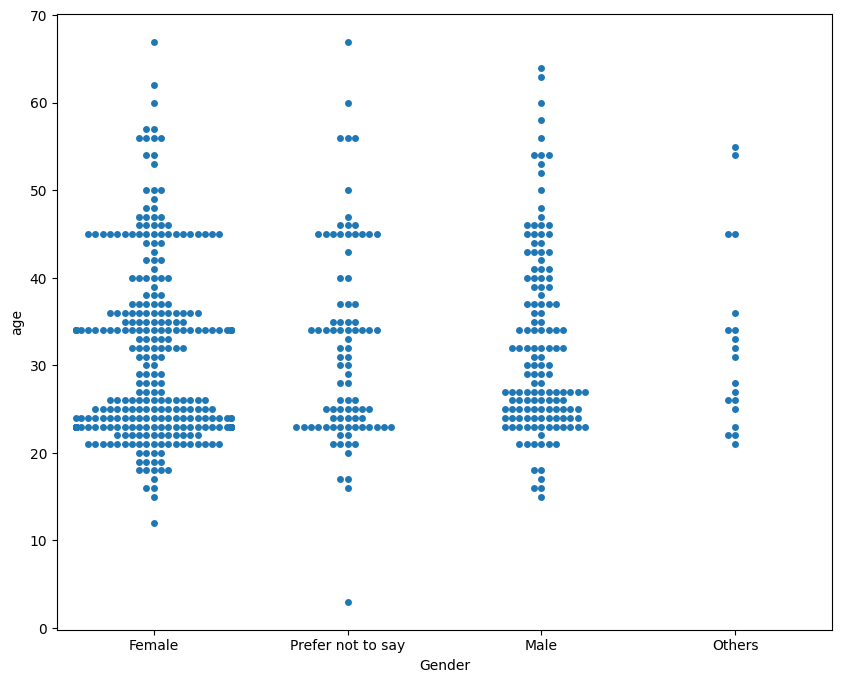

In [7]:
# Swarm plot
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Gender', y='age', data=df)
plt.show()

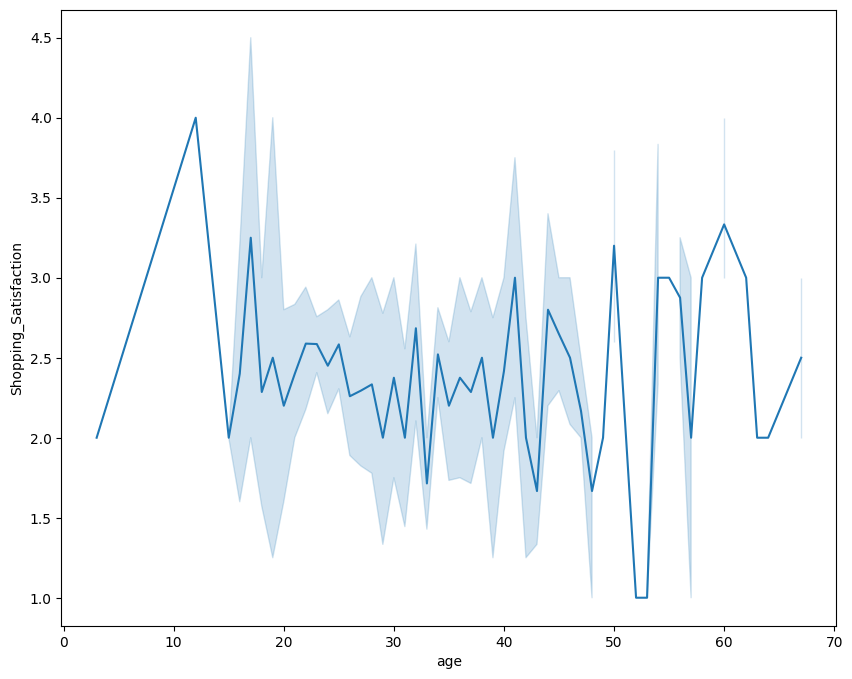

In [8]:
# Line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='Shopping_Satisfaction', data=df)
plt.show()

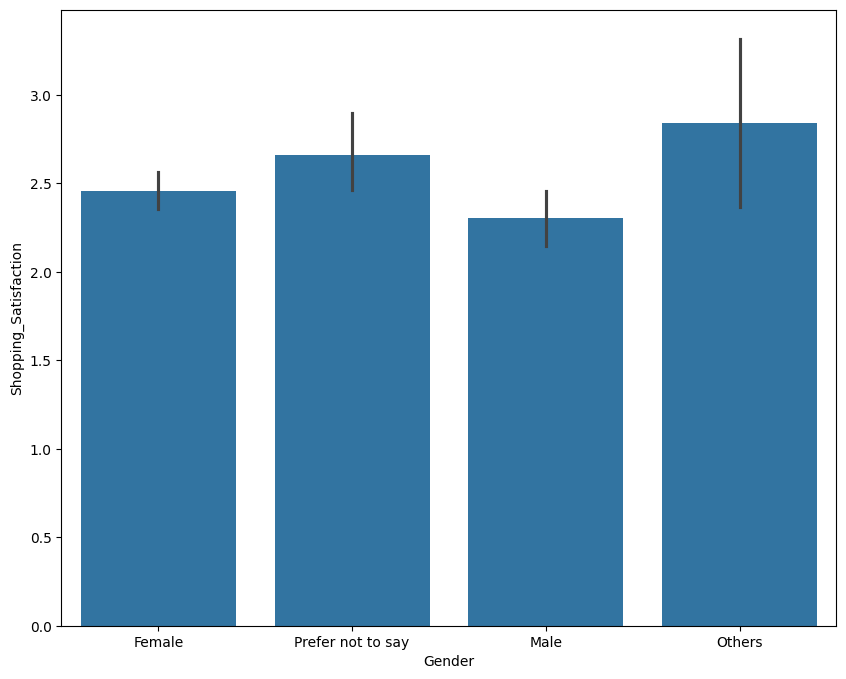

In [9]:
# Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Gender', y='Shopping_Satisfaction', data=df)
plt.show()

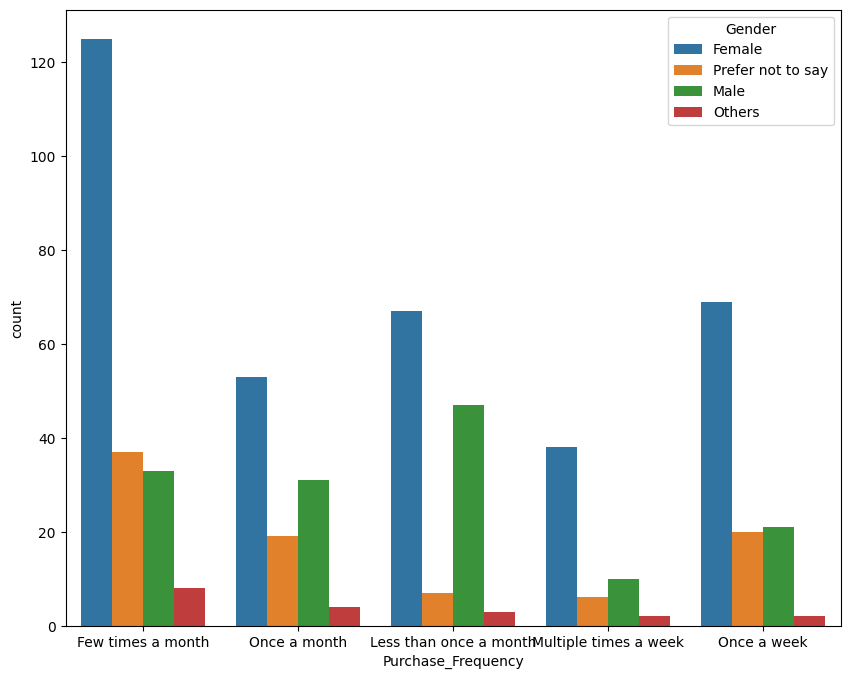

In [10]:
# Count plot
plt.figure(figsize=(10, 8))
sns.countplot(x='Purchase_Frequency', hue='Gender', data=df)
plt.show()

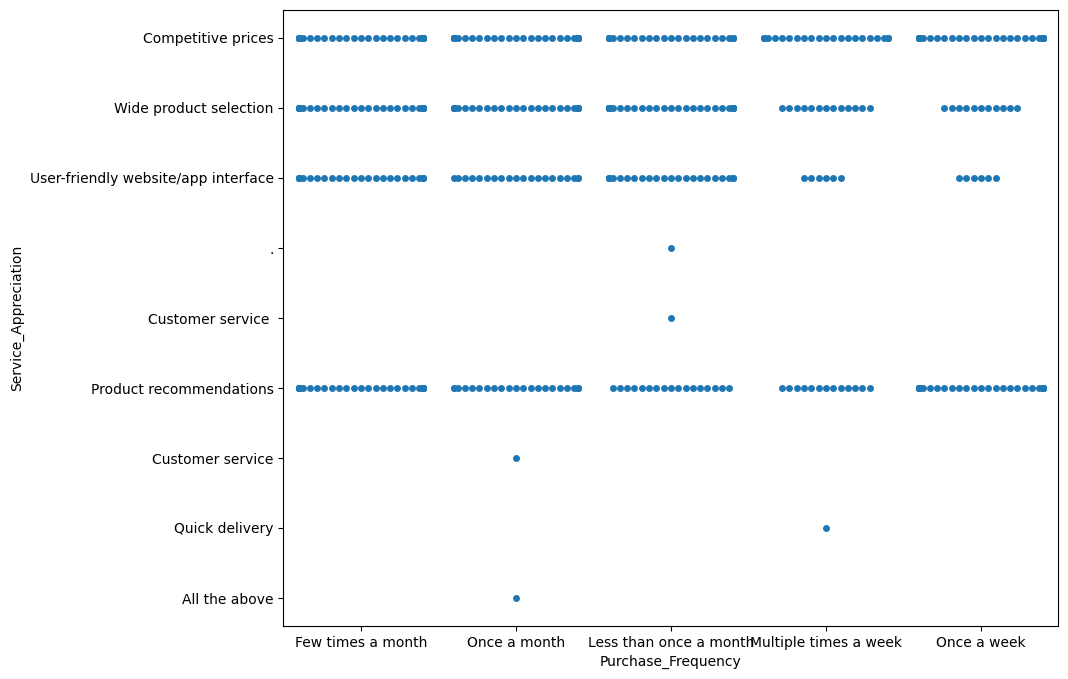

In [11]:
# Swarm plot
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Purchase_Frequency', y='Service_Appreciation', data=df)
plt.show()

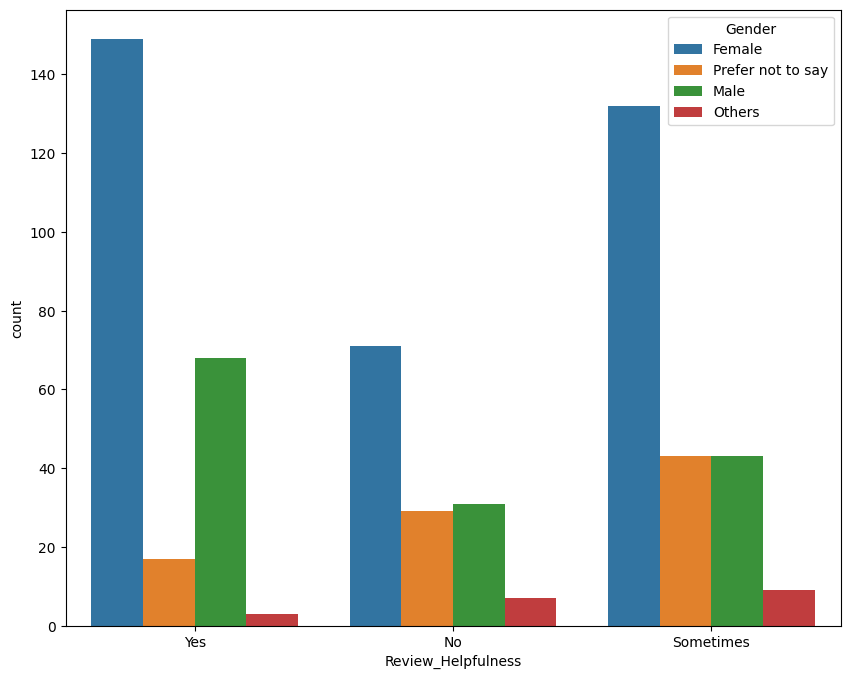

In [12]:
# Count plot
plt.figure(figsize=(10, 8))
sns.countplot(x='Review_Helpfulness', hue='Gender', data=df)
plt.show()

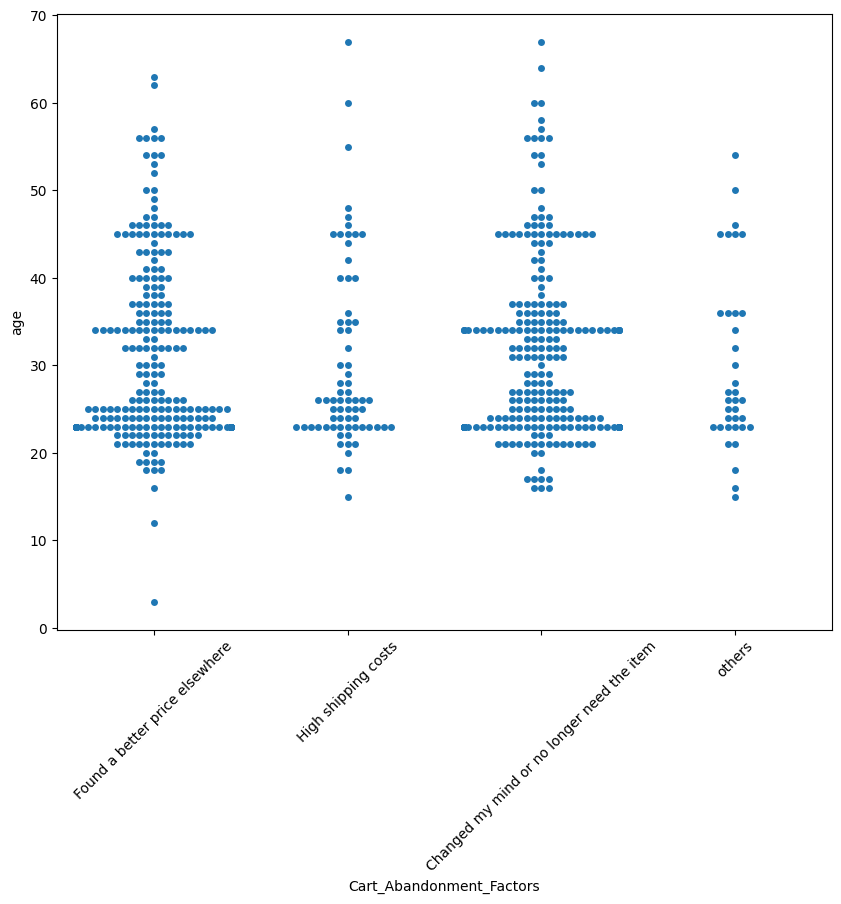

In [13]:
# Swarm plot
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Cart_Abandonment_Factors', y='age', data=df)
plt.xticks(rotation=45)
plt.show()

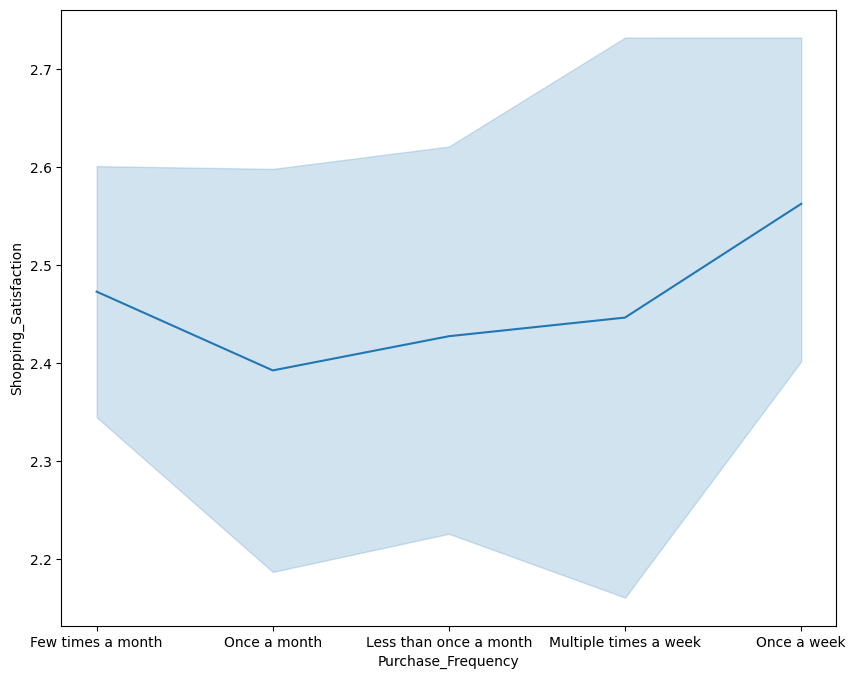

In [14]:
# Line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='Purchase_Frequency', y='Shopping_Satisfaction', data=df)
plt.show()

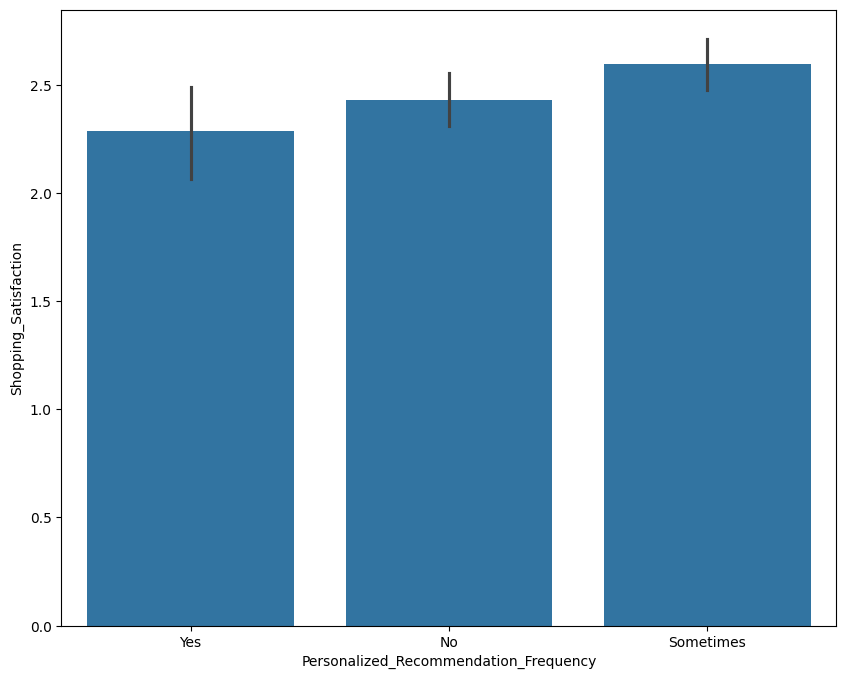

In [15]:
# Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Personalized_Recommendation_Frequency', y='Shopping_Satisfaction', data=df)
plt.show()

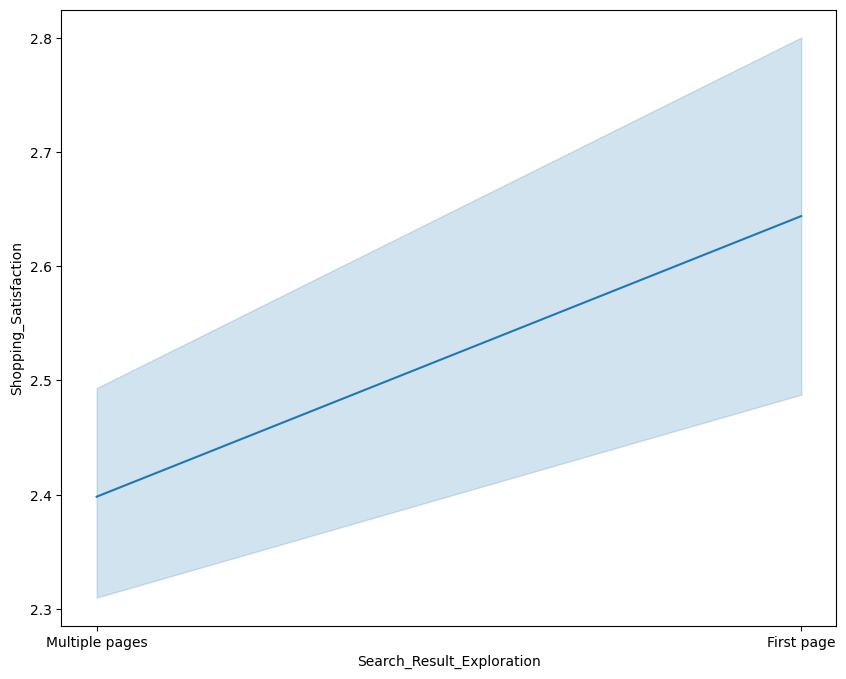

In [18]:
# Line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='Search_Result_Exploration', y='Shopping_Satisfaction', data=df)
plt.show()

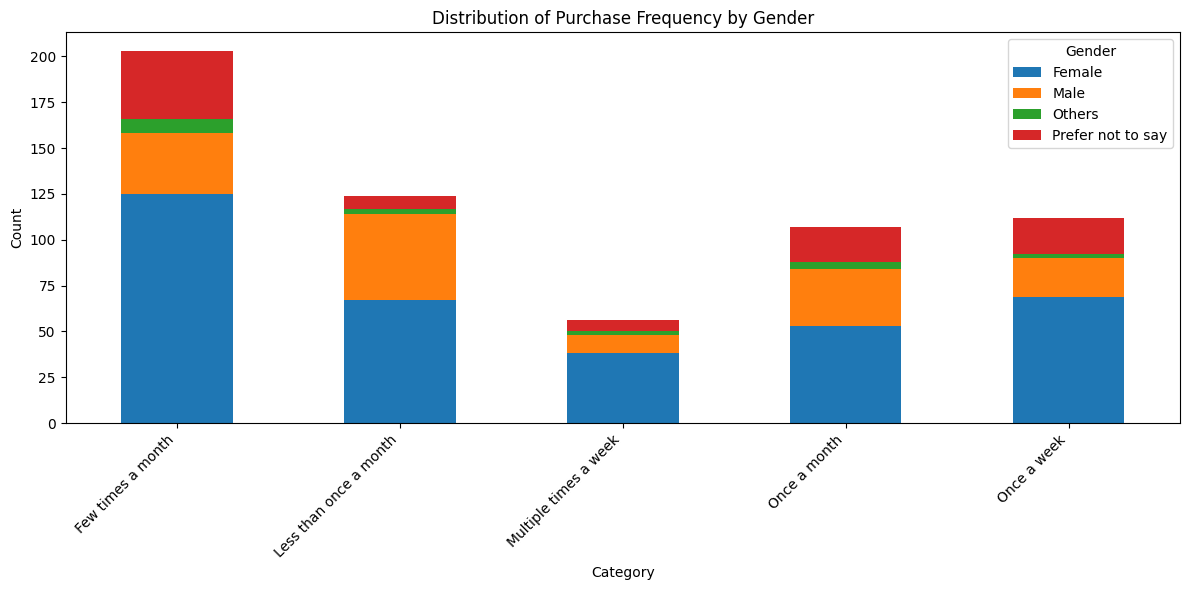

In [19]:
# Split categories where there are multiple categories separated by ';'
categories = df['Purchase_Frequency'].str.split(';', expand=True).stack()

# Reset the index of categories to convert MultiIndex to flat Index
categories = categories.reset_index(level=1, drop=True)

# Combine the categories with the corresponding gender
category_gender = pd.concat([categories, df['Gender'].loc[categories.index]], axis=1)
category_gender.columns = ['Category', 'Gender']

# Get value counts of each category by gender
category_counts_by_gender = category_gender.groupby(['Category', 'Gender']).size().unstack()

# Plot the distribution of categories by gender
plt.figure(figsize=(12, 6))
category_counts_by_gender.plot(kind='bar', stacked=True, ax=plt.gca())

# Move the legend to the bottom right of the plot
plt.legend(title='Gender', loc='best')
plt.title('Distribution of Purchase Frequency by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [21]:
df.dropna(subset=['Product_Search_Method'], inplace=True)

In [22]:
df.shape

(600, 23)

In [23]:
print(len(df[df.duplicated()]))

0


In [26]:
df = df.drop(['Timestamp'], axis=1)

###**Onehot Encoding**

###**Label Encoder**

#####**Improvement_Areas**

In [27]:
df['Improvement_Areas'].value_counts()

Improvement_Areas
Customer service responsiveness                                                   216
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     78
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

#####**Gender**

In [28]:
df['Gender'].value_counts()

Gender
Female               350
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

#####**Purchase_Frequency**

In [30]:
df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few times a month         202
Less than once a month    124
Once a week               112
Once a month              106
Multiple times a week      56
Name: count, dtype: int64

In [31]:
# Perform one-hot encoding for the 'Purchase_Frequency' column and store it in the DataFrame
df = pd.get_dummies(df, columns=['Purchase_Frequency'], prefix='Purchase_Frequency', dtype=int)

#####**Purchase_Categories**

In [32]:
df['Purchase_Categories'].value_counts()

Purchase_Categories
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                105
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others

In [33]:
# Split the 'Purchase_Categories' column into separate columns
categories_df = df['Purchase_Categories'].str.get_dummies(sep=';')

In [34]:
# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, categories_df], axis=1)

In [35]:
# Drop the original 'Purchase_Categories' column
df.drop('Purchase_Categories', axis=1, inplace=True)

#####**Personalized_Recommendation_Frequency**

In [36]:
df['Personalized_Recommendation_Frequency'].value_counts()

Personalized_Recommendation_Frequency
No           250
Sometimes    228
Yes          122
Name: count, dtype: int64

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [38]:
# Encode the 'Personalized_Recommendation_Frequency' column
df['Personalized_Recommendation_Frequency'] = label_encoder.fit_transform(df['Personalized_Recommendation_Frequency'])

#####**Browsing_Frequency**

In [39]:
df['Browsing_Frequency'].value_counts()

Browsing_Frequency
Few times a week        248
Few times a month       199
Rarely                   77
Multiple times a day     76
Name: count, dtype: int64

In [40]:
# Perform label encoding
df['Browsing_Frequency'] = label_encoder.fit_transform(df['Browsing_Frequency'])

#####**Product_Search_Method**

In [41]:
df['Product_Search_Method'].value_counts()

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64

In [42]:
# Define a mapping dictionary
mapping = {'categories': 0, 'Keyword': 1, 'Filter': 2, 'others': 3}

In [43]:
# Map the categories to numerical values
df['Product_Search_Method'] = df['Product_Search_Method'].map(mapping)

#####**Search_Result_Exploration**

In [44]:
df['Search_Result_Exploration'].value_counts()

Search_Result_Exploration
Multiple pages    440
First page        160
Name: count, dtype: int64

In [45]:
# Define the condition and values for encoding
condition = df['Search_Result_Exploration'] == 'Multiple pages'
value_if_true = 1
value_if_false = 0

In [46]:
# Use np.where to encode the column
df['Search_Result_Exploration'] = np.where(condition, value_if_true, value_if_false)

#####**Add_to_Cart_Browsing**

In [47]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    247
Yes      215
No       138
Name: count, dtype: int64

In [48]:
# Define the mapping of values to integers
mapping = {'Maybe': 1, 'Yes': 2, 'No': 0}

In [49]:
# Use the map function to apply the mapping to the column
df['Add_to_Cart_Browsing'] = df['Add_to_Cart_Browsing'].map(mapping)

In [50]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Cart_Completion_Frequency'], prefix='Cart_Completion',dtype=int)

In [51]:
df['Cart_Abandonment_Factors'].value_counts()

Cart_Abandonment_Factors
Found a better price elsewhere                254
Changed my mind or no longer need the item    240
High shipping costs                            70
others                                         36
Name: count, dtype: int64

In [52]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Cart_Abandonment_Factors'], prefix='Cart_Abandonment',dtype=int)

#####**Saveforlater_Frequency**

In [53]:
df['Saveforlater_Frequency'].value_counts()

Saveforlater_Frequency
Sometimes    251
Often        154
Rarely        82
Never         59
Always        54
Name: count, dtype: int64

In [54]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Saveforlater_Frequency'], prefix='Saveforlater',dtype=int)

#####**Review_Left**

In [55]:
df['Review_Left'].value_counts()

Review_Left
Yes    310
No     290
Name: count, dtype: int64

In [56]:
# Define the mapping dictionary
review_left_mapping = {'No': 0, 'Yes': 1}

In [57]:
# Map the values in the 'Review_Left' column using the defined mapping
df['Review_Left'] = df['Review_Left'].map(review_left_mapping)

#####**Review_Reliability**

In [58]:
df['Review_Reliability'].value_counts()

Review_Reliability
Moderately      197
Occasionally    190
Heavily         149
Rarely           41
Never            23
Name: count, dtype: int64

In [59]:
# Define the mapping dictionary
review_reliability_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Occasionally': 2,
    'Moderately': 3,
    'Heavily': 4
}

In [60]:
# Map the values in the 'Review_Reliability' column using the defined mapping
df['Review_Reliability'] = df['Review_Reliability'].map(review_reliability_mapping)

#####**Review_Helpfulness**

In [61]:
df['Review_Helpfulness'].value_counts()

Review_Helpfulness
Yes          237
Sometimes    226
No           137
Name: count, dtype: int64

In [62]:
# Define the mapping dictionary
review_helpfulness_mapping = {
    'No': 0,
    'Sometimes': 1,
    'Yes': 2
}

In [63]:
# Map the values in the 'Review_Helpfulness' column using the defined mapping
df['Review_Helpfulness'] = df['Review_Helpfulness'].map(review_helpfulness_mapping)

#####**Recommendation_Helpfulness**

In [64]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
Sometimes    272
No           171
Yes          157
Name: count, dtype: int64

In [65]:
# Define the mapping dictionary
recommendation_helpfulness_mapping = {
    'No': 0,
    'Sometimes': 1,
    'Yes': 2
}

In [66]:
# Map the values in the 'Recommendation_Helpfulness' column using the defined mapping
df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].map(recommendation_helpfulness_mapping)

#####**Service_Appreciation**

In [67]:
df['Service_Appreciation'].value_counts()

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 149
User-friendly website/app interface     79
.                                        1
Customer service                         1
Customer service                         1
Quick delivery                           1
All the above                            1
Name: count, dtype: int64

In [68]:
# Perform one-hot encoding for the 'Service_Appreciation' column
df = pd.get_dummies(df, columns=['Service_Appreciation'], prefix='Service',dtype=int)

#####**Improvement_Areas**

In [69]:
df['Improvement_Areas'].value_counts()

Improvement_Areas
Customer service responsiveness                                                   216
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     78
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

In [70]:
# Split the values in the "Improvement_Areas" column by delimiter ';'
df['Improvement_Areas'] = df['Improvement_Areas'].str.split(';')

In [71]:
# Perform one-hot encoding for the "Improvement_Areas" column
df = df.explode('Improvement_Areas')

In [72]:
df = pd.get_dummies(df, columns=['Improvement_Areas'], prefix='Improvement',dtype=int)

In [73]:
df.head()

,age,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Review_Left,Review_Reliability,Review_Helpfulness,...,Improvement_Nothing,Improvement_Product quality and accuracy,Improvement_Quality of product is very poor according to the big offers,Improvement_Reducing packaging waste,Improvement_Scrolling option would be much better than going to next page,Improvement_Shipping speed and reliability,Improvement_UI,Improvement_User interface,Improvement_User interface of app,Improvement_better app interface and lower shipping charges
0,23,2,1,1,1,1,2,1,2,2,...,0,0,0,1,0,0,0,0,0,0
1,23,2,0,1,1,1,2,0,4,2,...,0,0,0,1,0,0,0,0,0,0
2,24,0,0,1,1,2,2,0,2,0,...,0,1,0,0,0,0,0,0,0,0
3,24,1,0,1,0,5,1,1,4,2,...,0,1,0,0,0,0,0,0,0,0
4,22,2,0,2,1,1,2,0,4,2,...,0,1,0,0,0,0,0,0,0,0


In [75]:
# Define your features
X = df.drop(['Personalized_Recommendation_Frequency'], axis=1)

In [76]:
# Define your target variable
y = df['Personalized_Recommendation_Frequency']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=4)

In [79]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [80]:
# Fit and transform the scaler on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####**Logistic Regression**

In [81]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

In [82]:
# Fit the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [83]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

In [84]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.54      0.47        24
           1       0.45      0.36      0.40        28
           2       0.14      0.12      0.13         8

    accuracy                           0.40        60
   macro avg       0.34      0.34      0.34        60
weighted avg       0.40      0.40      0.39        60



#####**Random Forest classifier**

In [86]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [87]:
# Fit the model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [88]:
# Make predictions on the test set
rf_pred = rf_classifier.predict(X_test_scaled)

In [89]:
# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        24
           1       0.52      0.39      0.45        28
           2       0.20      0.12      0.15         8

    accuracy                           0.47        60
   macro avg       0.40      0.39      0.38        60
weighted avg       0.46      0.47      0.45        60



#####**SVM classifier**

In [91]:
# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

In [92]:
# Fit the model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [93]:
# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test_scaled)

In [94]:
# Classification Report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.79      0.60        24
           1       0.59      0.36      0.44        28
           2       0.00      0.00      0.00         8

    accuracy                           0.48        60
   macro avg       0.36      0.38      0.35        60
weighted avg       0.47      0.48      0.45        60



#####**KNeighbors Classifier**

In [96]:
# Initialize K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

In [97]:
# Fit the model on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [98]:
# Make predictions on the test set
knn_pred = knn_classifier.predict(X_test_scaled)

In [99]:
# Classification Report for K-Nearest Neighbors
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.56        24
           1       0.60      0.54      0.57        28
           2       0.00      0.00      0.00         8

    accuracy                           0.50        60
   macro avg       0.37      0.39      0.37        60
weighted avg       0.48      0.50      0.49        60



In [100]:
y.value_counts()

Personalized_Recommendation_Frequency
0    250
1    228
2    122
Name: count, dtype: int64

#####Based on the shape of the y variable you provided, it seems that the classes are imbalanced, with class 0 having 250 instances, class 1 having 228 instances, and class 2 having 122 instances. To classify the majority class as a baseline model

#####**Smote**

In [101]:
# Initialize SMOTE
sm = SMOTE()

In [102]:
# Apply SMOTE to resample the data
X_resampled, y_resampled = sm.fit_resample(X, y.ravel())

In [103]:
# Display class distribution before and after SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0)))

Before OverSampling, counts of label '1': 228
Before OverSampling, counts of label '0': 250
After OverSampling, counts of label '1': 250
After OverSampling, counts of label '0': 250


In [104]:
# Split the resampled data into training and testing sets
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.3)

In [110]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [111]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [112]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [113]:
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [114]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [115]:
# Make predictions on the test set using the best model
rf_pred = grid_search.best_estimator_.predict(X_test)

In [116]:
# Generate and print the classification report
print("Random Forest Classification Report after hyperparameter tuning:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        69
           1       0.77      0.86      0.81        77
           2       0.94      0.61      0.74        79

    accuracy                           0.79       225
   macro avg       0.81      0.80      0.79       225
weighted avg       0.82      0.79      0.79       225



The Random Forest classification report after hyperparameter tuning shows significant improvements in precision, recall, and F1-score for all classes compared to the results obtained from the normal Random Forest classifier.

*   Generalization: The improved performance of the hyperparameter-tuned model suggests that it may generalize better to unseen data compared to the normal Random Forest classifier. This indicates that the model has learned more meaningful patterns from the data and is better at capturing the underlying relationships between features and target classes.

**Summary:**

The Amazon Consumer Behaviour Dataset provided valuable insights into the purchasing behavior and preferences of Amazon customers. The dataset contained various demographic and behavioral attributes such as age, gender, purchase frequency, product categories, personalized recommendation frequency, and more. Our objective was to analyze this dataset to understand customer behavior better and identify areas for improvement in Amazon's services.

We began by performing one-hot encoding to preprocess categorical variables and prepare the data for modeling. Subsequently, we applied logistic regression, random forest, SVM classifier, and KNeighbors classifier to predict customer behavior. However, the initial results showed poor performance due to the unbalanced nature of the dataset.

To address this imbalance and improve model performance, we applied the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority classes. We then performed hyperparameter tuning on the Random Forest classifier, which resulted in significant improvements in precision, recall, and F1-score for all classes.

**Conclusions:**

1. **Data Understanding**: The analysis of the Amazon Consumer Behaviour Dataset provided valuable insights into various aspects of customer behavior on the platform.

2. **Model Performance**: The initial models showed poor performance due to the unbalanced dataset. However, by applying SMOTE to address the class imbalance and performing hyperparameter tuning on the Random Forest classifier, we achieved significant improvements in model performance.

3. **Recommendations**: Based on the improved model performance, we recommend that Amazon leverage these insights to enhance its services, personalize recommendations, and improve the overall shopping experience for its customers. Areas such as personalized recommendations, customer reviews, and browsing experience could be prioritized for further enhancement.

4. **Future Work**: Future work could involve exploring additional modeling techniques, such as ensemble methods or deep learning algorithms, to further improve predictive performance. Additionally, collecting more granular data and conducting deeper analyses could provide additional insights into customer behavior and preferences.